In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL, MSTL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#get tesla prices from yahoo finance
import yfinance as yf
ticker = 'C'
start = '2010-01-01'
end = '2024-12-31'
train_start = start
train_end = '2018-12-31'
test_start = '2019-01-01'
test_end = end
period = 12 # for STL decomposition
td = yf.download(ticker, start=start, end=end)
td = td['Adj Close']

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['C']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


In [47]:
# year is too long, so we will use monthly data
td = td.resample('ME').last().dropna()
td = td.loc[start:end]


In [48]:
# plt.plot(td)
# plt.grid()
# #plt.xticks(rotation = 40)
# plt.title(ticker + ' Adjusted Closing Price');

In [49]:

y_hist = td.loc[train_start:train_end, ticker]
y_future = td.loc[test_start : test_end, ticker]

# # add convolution filter
# y_hist = convolution_filter(y_hist, np.ones(12)/12)
# y_future = convolution_filter(y_future, np.ones(12)/12)


# Answer check
print('Historical:')
print(y_hist.tail())
print('=========\nFuture:')
print(y_future.head())



Historical:
Date
2018-08-31    56.458248
2018-09-30    56.854515
2018-10-31    51.877575
2018-11-30    51.700001
2018-12-31    41.541939
Freq: ME, Name: C, dtype: float64
Future:
Date
2019-01-31    51.436680
2019-02-28    51.412567
2019-03-31    49.998276
2019-04-30    56.812580
2019-05-31    50.263500
Freq: ME, Name: C, dtype: float64


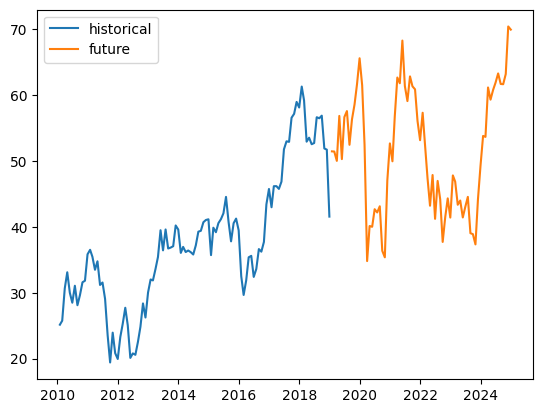

In [50]:
plt.plot(y_hist, label = 'historical')
plt.plot(y_future, label = 'future')
plt.legend();


In [51]:


stl = ''
results = ''
# set period to 12 for monthly data
stl = STL(y_hist, period = period) # - most robust
#stl = MSTL(y_hist,periods=[24, 160]) # - Data with multiple seasonalities
#stl = seasonal_decompose(y_hist, period = 12)
y_hist = y_hist.dropna()
results = stl.fit()



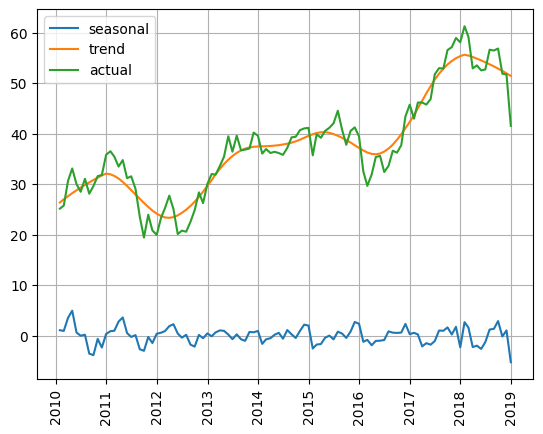

In [52]:

season_and_trend = results.seasonal + results.trend

plt.plot(results.seasonal, label = 'seasonal')
plt.plot(results.trend, label = 'trend')
# plt.plot(season_and_trend[train_start:], label = 'seasonal + trend')
plt.plot(y_hist[train_start:], label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);

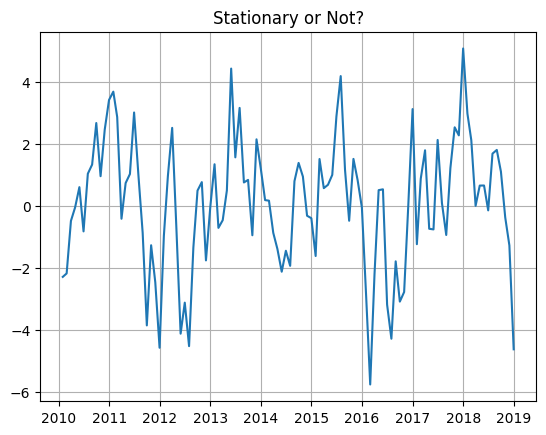

In [53]:
plt.plot(results.resid)
plt.grid()
plt.title('Stationary or Not?');

In [54]:
#instantiate
stlf = STLForecast(y_hist, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"})
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(len(y_future))


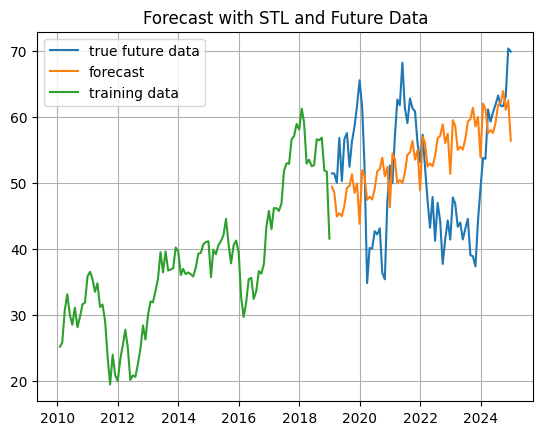

In [55]:
plt.plot(y_future, label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.plot(y_hist[train_start:], label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [56]:

pred_error = y_future - forecast
mae = np.mean(np.abs(pred_error))
rmse = np.sqrt(np.mean(pred_error**2))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 8.90812708514777
RMSE: 10.524734300232472


In [2]:
# import module
from sklearn.preprocessing import StandardScaler
 
# create data
data = [[11, 2], [3, 7], [0, 10], [11, 8]]
 
# compute required values
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)
 
# print scaled data
print(data)

[[11, 2], [3, 7], [0, 10], [11, 8]]


FileNotFoundError: [Errno 2] No such file or directory: 'pradeeps.csv'